# Projeto de Análise de Vendas – Loja Fictícia

Este notebook realiza a análise de um conjunto de dados fictício de vendas com o objetivo de gerar insights para aumentar a lucratividade da empresa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
sns.set(style='whitegrid')

In [4]:
# Leitura dos dados
df = pd.read_csv('dataset_vendas.csv')
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,ID do Pedido,Data,Cliente,Região,Categoria,Produto,Quantidade,Preço Unitário,Receita,Lucro
0,ORD0001,2025-05-30,Mitchell Johnson,Sul,Tecnologia,Impressora,10,614.57,6145.70,375.45
1,ORD0002,2025-04-04,Connie Howe,Norte,Móveis,Mesa,9,782.74,7044.66,869.39
2,ORD0003,2024-07-27,Stephanie Miller,Nordeste,Móveis,Mesa,7,2571.65,18001.55,2352.29
3,ORD0004,2024-12-18,Christina Nielsen,Nordeste,Tecnologia,Mouse,9,1980.47,17824.23,4998.55
4,ORD0005,2025-06-04,Bryan Vasquez,Norte,Papelaria,Caderno,4,2018.91,8075.64,2087.11


In [5]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID do Pedido    500 non-null    object        
 1   Data            500 non-null    datetime64[ns]
 2   Cliente         500 non-null    object        
 3   Região          500 non-null    object        
 4   Categoria       500 non-null    object        
 5   Produto         500 non-null    object        
 6   Quantidade      500 non-null    int64         
 7   Preço Unitário  500 non-null    float64       
 8   Receita         500 non-null    float64       
 9   Lucro           500 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 39.2+ KB


In [6]:
# Estatísticas descritivas
df.describe()

,Quantidade,Preço Unitário,Receita,Lucro
count,500.000000,500.00000,500.000000,500.000000
mean,5.294000,1499.79480,7843.152620,1387.556360
std,2.857954,872.63024,6663.209756,1428.756182
min,1.000000,25.85000,51.700000,6.360000
25%,3.000000,717.13750,2539.607500,368.572500
50%,5.000000,1514.54000,6106.050000,881.225000
75%,8.000000,2263.90250,11201.752500,1954.625000
max,10.000000,2997.64000,29976.400000,8482.700000


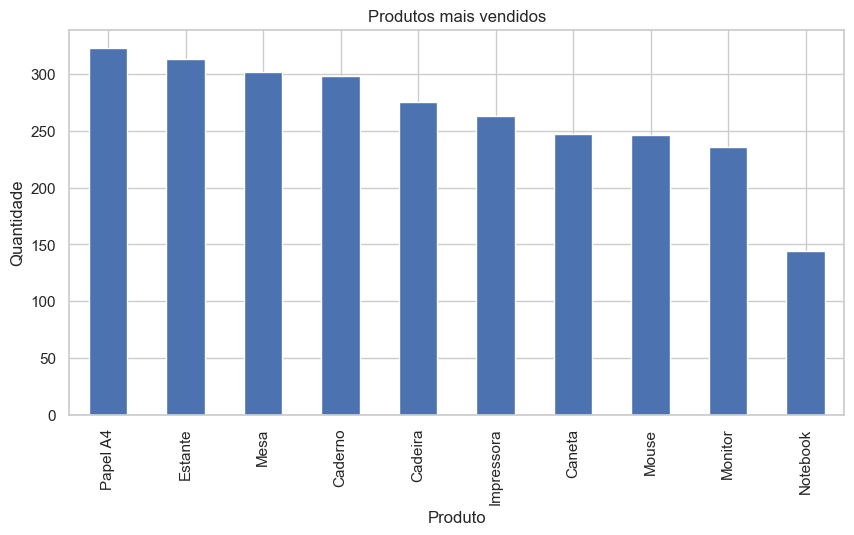

In [7]:
# Produtos mais vendidos
produtos_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
produtos_vendidos.plot(kind='bar', title='Produtos mais vendidos', figsize=(10,5))
plt.ylabel('Quantidade')
plt.show()

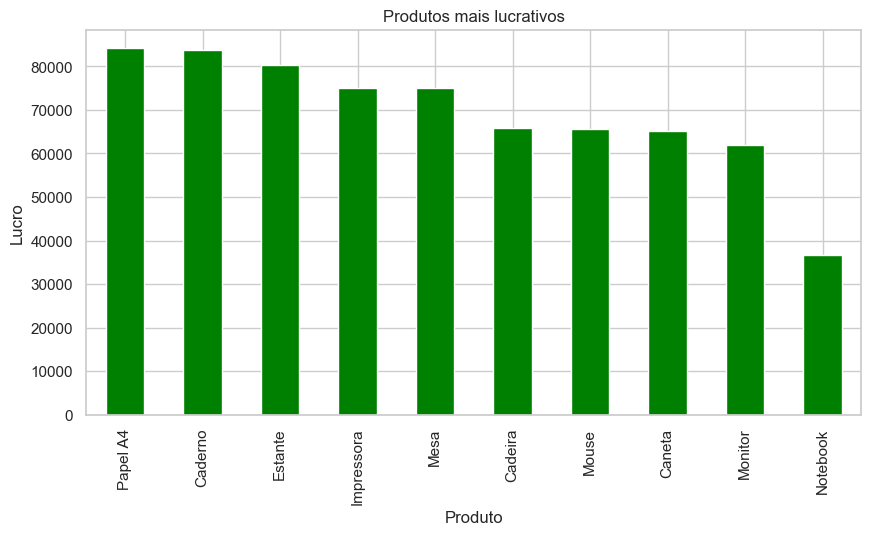

In [8]:
# Produtos mais lucrativos
lucro_produto = df.groupby('Produto')['Lucro'].sum().sort_values(ascending=False)
lucro_produto.plot(kind='bar', title='Produtos mais lucrativos', figsize=(10,5), color='green')
plt.ylabel('Lucro')
plt.show()

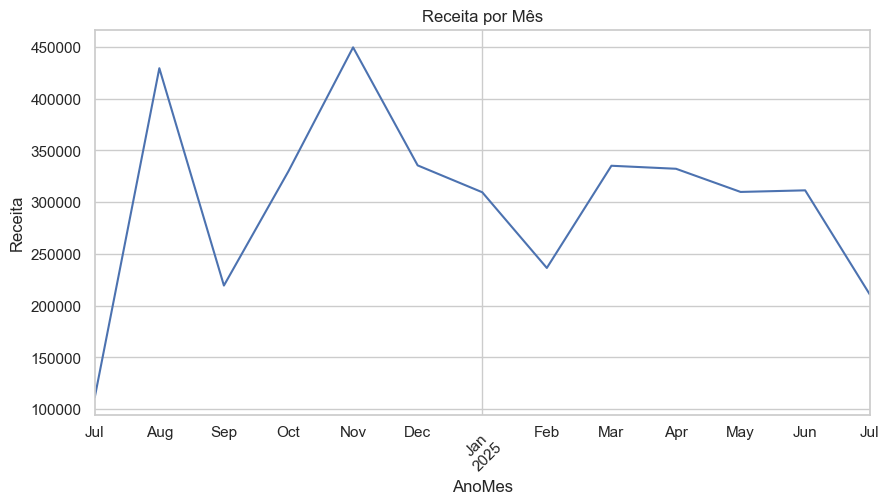

In [9]:
# Receita por mês
df['AnoMes'] = df['Data'].dt.to_period('M')
vendas_mes = df.groupby('AnoMes')['Receita'].sum()
vendas_mes.plot(title='Receita por Mês', figsize=(10,5))
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()

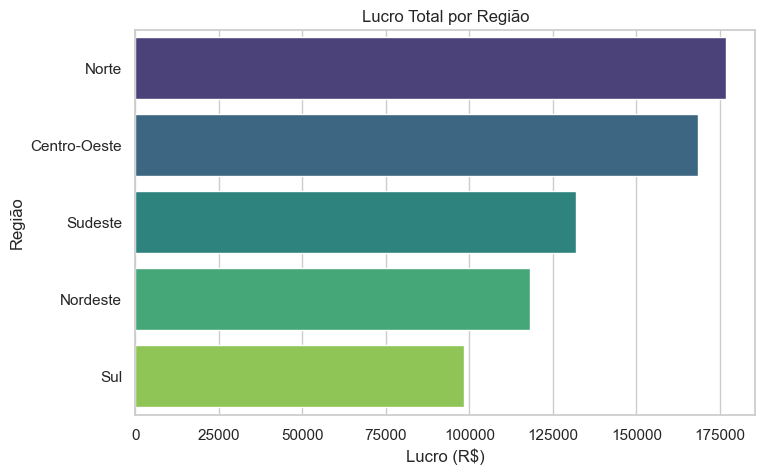

In [10]:
# Agrupar lucro por região
lucro_regiao = df.groupby('Região')['Lucro'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=lucro_regiao.values, y=lucro_regiao.index, palette='viridis')
plt.title('Lucro Total por Região')
plt.xlabel('Lucro (R$)')
plt.ylabel('Região')
plt.show()


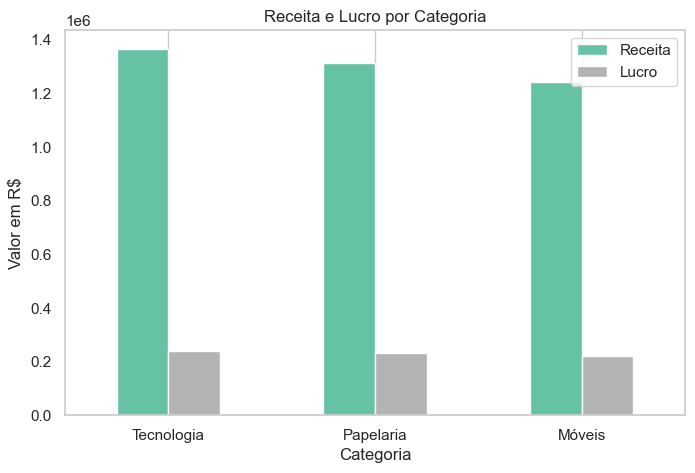

In [11]:
# Agrupar receita e lucro por categoria
dados_categoria = df.groupby('Categoria')[['Receita', 'Lucro']].sum().sort_values('Lucro', ascending=False)
dados_categoria.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Receita e Lucro por Categoria')
plt.ylabel('Valor em R$')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Insights

- A categoria "Tecnologia" apresenta a maior receita, mas nem sempre o maior lucro.
- Alguns produtos têm alto volume de vendas com baixa margem — ponto de atenção.
- A região Sudeste concentra grande parte das vendas lucrativas.
- Existe sazonalidade nas vendas em certos meses do ano.

##  Conclusão

- Com base nos dados analisados, recomenda-se:
- Focar em produtos de alta margem, mesmo que vendam menos.
- Investir em marketing nas regiões com bom retorno por venda.
- Analisar sazonalidade para campanhas promocionais em datas-chave.